In [67]:
#goal is to run statistical hypothesis tests on the data

import pandas as pd
import numpy as np
import statistics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import math


In [5]:
df = pd.read_csv("data.csv", low_memory=False)

In [8]:
#exploring the data initially
df.columns

Index(['Row ID', 'Year', 'Department Title', 'Payroll Department',
       'Record Number', 'Job Class Title', 'Employment Type',
       'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
       '% Over Base Pay', 'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'MOU', 'MOU Title', 'FMS Department',
       'Job Class', 'Pay Grade', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost', 'Benefits Plan',
       'Job Class Link'],
      dtype='object')

In [9]:
df.shape

(285008, 35)

In [10]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [15]:
#checking number of employees per department and the top 5
df['Department Title'].value_counts().head()

Police (LAPD)            66057
Water And Power (DWP)    53545
Recreation And Parks     35344
Fire (LAFD)              18134
Airports (LAWA)          18060
Name: Department Title, dtype: int64

In [38]:
#examining if any benefits by department
#choose a subset of columns required 
dep_benefits = df[['Department Title', 'Year','Base Pay', 'Job Class Title', 'Employment Type','Projected Annual Salary', 'Average Health Cost', 'Average Dental Cost','Average Basic Life', 'Average Benefit Cost', 'Benefits Plan']]
dep_benefits.head()

,Department Title,Year,Base Pay,Job Class Title,Employment Type,Projected Annual Salary,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan
0,Water And Power (DWP),2014,$60310.57,Commercial Service Representative,Full Time,$70386.48,$16842.08,$1282.61,$0.00,$18124.69,DWP
1,Police (LAPD),2013,$49507.05,Police Officer I,Full Time,$52450.56,$11651.40,$898.08,$191.04,$12740.52,Police
2,Police (LAPD),2013,$84909.41,Police Officer II,Full Time,$89303.76,$11651.40,$898.08,$191.04,$12740.52,Police
3,Harbor (Port of LA),2013,$57660.80,Senior Security Officer,Full Time,$60028.96,$10710.24,$405.24,$11.40,$11126.88,City
4,Public Works - Sanitation,2014,$59391.75,Senior Clerk Typist,Full Time,$64553.13,$11000.40,$409.68,$11.40,$11421.48,City


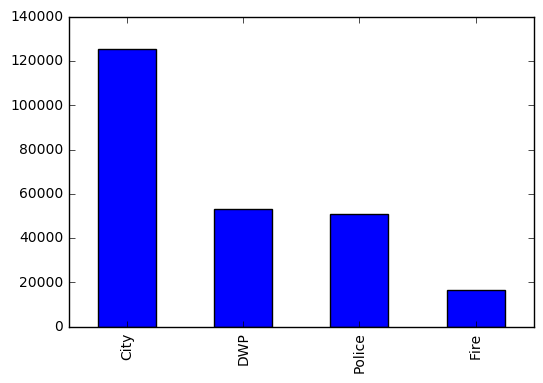

In [21]:
#types of benefit plans and the number of employees per plan
dep_benefits['Benefits Plan'].value_counts()
#plotting them to get a quick view
dep_benefits['Benefits Plan'].value_counts().plot(kind='bar')

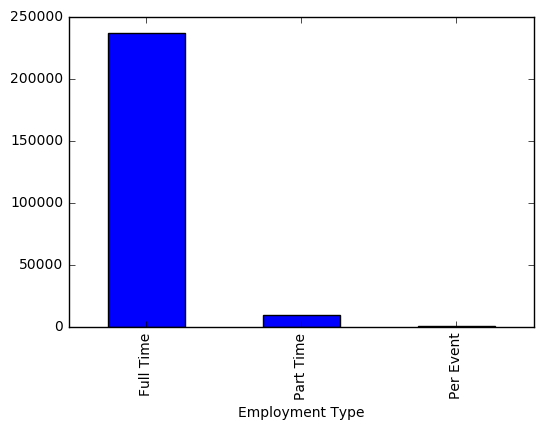

In [22]:
#figuring out employment type and the counts across each benefit type
employment_type = dep_benefits.groupby('Employment Type')
employment_type['Benefits Plan'].count().plot(kind='bar')

In [43]:
#exploring costs per plan and by department
#converting the strings and remove dollar sign etc, cleaning

dep_benefits = dep_benefits.replace('[\$,]', '', regex=True)
#all columns with numbers as strings to be converted to numeric data
dep_benefits[['Projected Annual Salary','Base Pay', 'Average Health Cost','Average Dental Cost','Average Basic Life','Average Benefit Cost']] = dep_benefits[['Projected Annual Salary','Base Pay', 'Average Health Cost','Average Dental Cost','Average Basic Life','Average Benefit Cost']].apply(pd.to_numeric)

#removing any 0 values
dep_benefits[['Projected Annual Salary', 'Base Pay']]!=0
#calculating costs per plan

plan_cost = dep_benefits.groupby('Benefits Plan')
plan_cost[['Average Health Cost', 'Average Dental Cost', 'Average Basic Life', 'Average Benefit Cost']].mean()

,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost
Benefits Plan,,,,
City,10224.177159,379.664718,10.565993,10614.407871
DWP,17144.440031,1261.268069,0.000000,18405.708101
Fire,12942.125659,900.633882,175.117193,14017.876734
Police,12237.952930,889.987808,191.217983,13319.158721


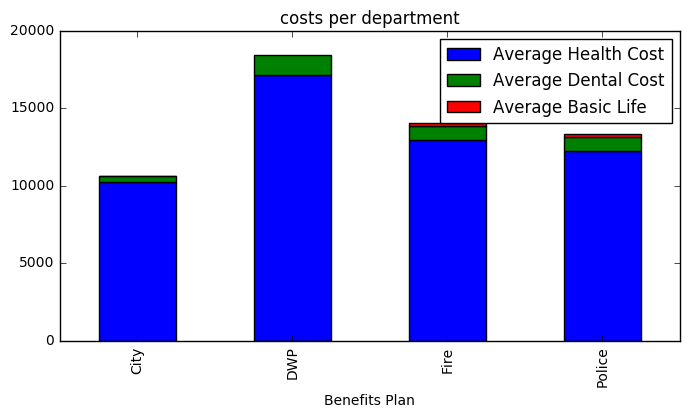

In [44]:
plan_cost[['Average Health Cost', 'Average Dental Cost', 'Average Basic Life']].mean().plot(kind='bar', stacked=True, figsize = (8,4), title = "costs per department")

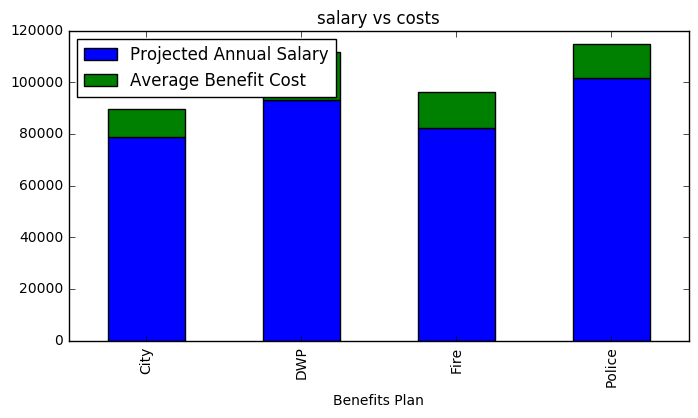

In [45]:
#salary vs benefit costs

plan_cost[['Projected Annual Salary', 'Average Benefit Cost']].mean().plot(kind='bar', stacked=True, figsize =(8,4), title ='salary vs costs')

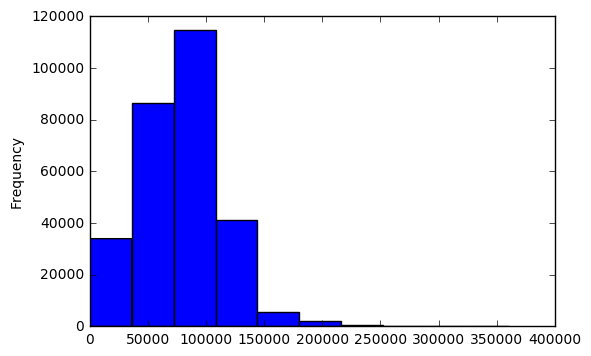

In [46]:
#plotting the distribution of salary
dep_benefits['Projected Annual Salary'].plot(kind='hist')

In [47]:
#creating two sample populations from the data

benefits_2015 = dep_benefits[dep_benefits.Year==2015]
benefits_2016 = dep_benefits[dep_benefits.Year==2016]

In [73]:
#population parameters

mean_2015 = benefits_2015['Projected Annual Salary'].mean()
std_dev_2015 = benefits_2015['Projected Annual Salary'].std()

mean_2016 = benefits_2016['Projected Annual Salary'].mean()
std_dev_2016 = benefits_2016['Projected Annual Salary'].std()

In [69]:
#sample parameters 

sample_2016 = benefits_2016.sample(frac = 0.10)

sample_2016_mean = sample_2016['Projected Annual Salary'].mean()

sample_2016_stdev = sample_2016['Projected Annual Salary'].std()

In [72]:
#hypothesis testing

#null = salary does not increase in 2016
#alternate hypothesis = salary does increase

#95% CI interval - one sided
zscore_critical = 1.65 

zscore_test_stat = ((sample_2016_mean - mean_2015)*math.sqrt(11091))/sample_2016_stdev
print(zscore_test_stat)

7.232843839605467


In [76]:
#null hypothesis rejected as the z score falls way beyond the critical score

#checking type 1 or type 2 error

zscore_error =((mean_2016 - mean_2015)/std_dev_2016)

print(zscore_error) #type1 error

0.06816254266447237
